In [ ]:
import numpy as np


IMAGE_SIZE = 50
NUM_SAMPLES = 10000

X = []
Y = []

for _ in range(NUM_SAMPLES):

    image = np.zeros((IMAGE_SIZE, IMAGE_SIZE), dtype=np.uint8)


    x = np.random.randint(0, IMAGE_SIZE)
    y = np.random.randint(0, IMAGE_SIZE)


    image[y, x] = 255

    flattened_image = image.flatten()


    X.append(flattened_image)
    Y.append([x, y])


X = np.array(X)
Y = np.array(Y)

print("Input shape (X):", X.shape)
print("Output shape (Y):", Y.shape)


Input shape (X): (10000, 2500)
Output shape (Y): (10000, 2)


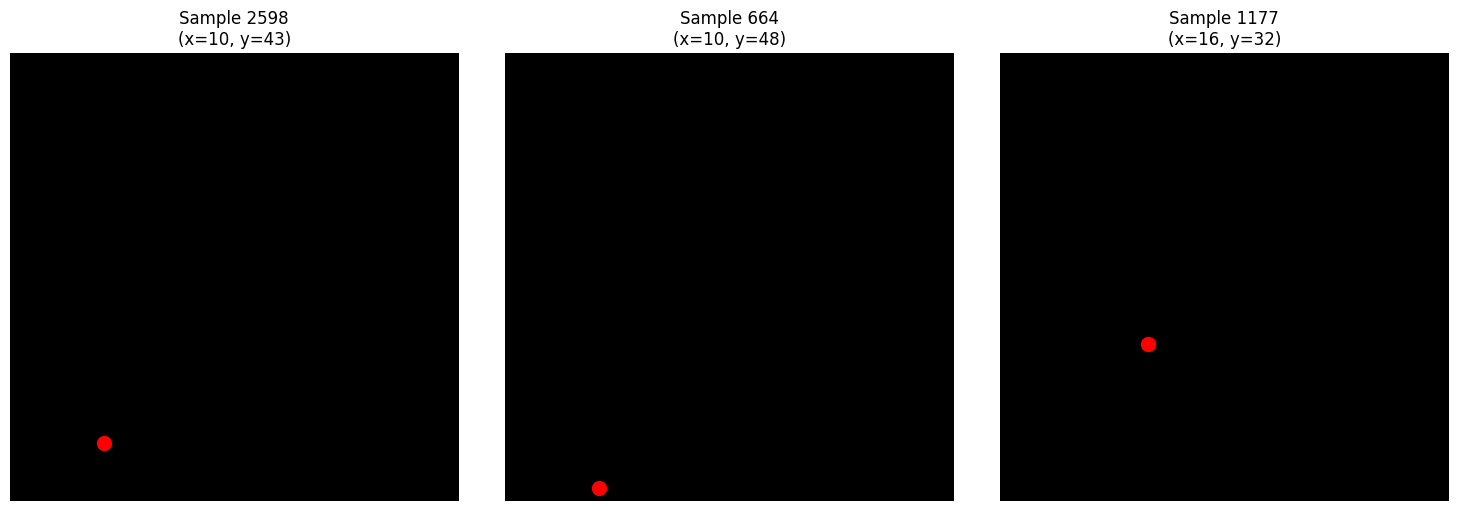

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

NUM_SAMPLES_TO_SHOW = 3
indices = np.random.choice(len(X), NUM_SAMPLES_TO_SHOW, replace=False)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(indices):
    image = X[idx].reshape(50, 50)
    x, y = Y[idx]

    plt.subplot(1, 3, i + 1)
    plt.imshow(image, cmap="gray")
    plt.scatter(x, y, c="red", s=100)
    plt.title(f"Sample {idx}\n(x={x}, y={y})")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
np.savez("dataset.npz", X=X, Y=Y)
import os
os.listdir()

['.config', 'dataset.npz', 'sample_data']

In [ ]:
import zipfile

with zipfile.ZipFile("pixel_dataset.zip", "w", zipfile.ZIP_DEFLATED) as zipf:
    zipf.write("dataset.npz")

print("pixel_dataset.zip created successfully")
from google.colab import files
files.download("pixel_dataset.zip")


pixel_dataset.zip created successfully


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data = np.load("dataset.npz")
print(data["X"].shape, data["Y"].shape)


(10000, 2500) (10000, 2)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


IMAGE_SIZE = 50
TEST_SIZE = 0.2
RANDOM_STATE = 42


data = np.load("dataset.npz")
X = data["X"]
Y = data["Y"]

X = X / 255.0
Y = Y / (IMAGE_SIZE - 1)


X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

print("Training set:", X_train.shape, Y_train.shape)
print("Testing set :", X_test.shape, Y_test.shape)


Training set: (8000, 2500) (8000, 2)
Testing set : (2000, 2500) (2000, 2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1070 - val_loss: 0.0126
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0058 - val_loss: 0.0063
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0023 - val_loss: 0.0053
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0015 - val_loss: 0.0049
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0010 - val_loss: 0.0045
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0010 - val_loss: 0.0041
Epoch 9/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 9.0594e-04 - val_loss: 0.0042
Epoch 10/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0010 - val_loss: 0.0038
Epoch 11/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 7.6528e-04 - val_loss: 0.0042
Epoch 12/30
250/250 ━━━━━━━━━━━━━

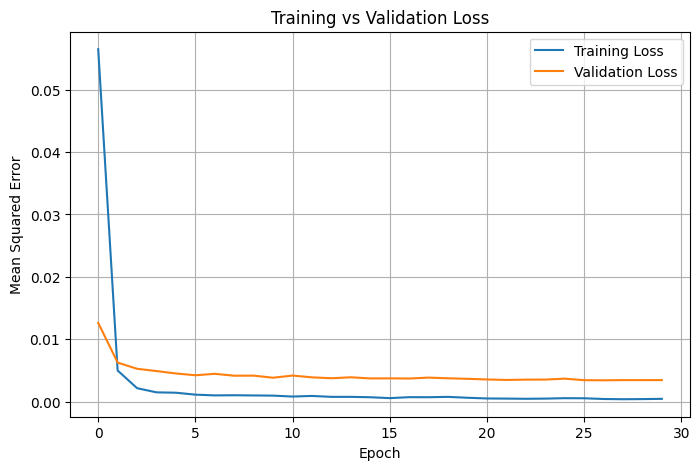

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


INPUT_DIM = X_train.shape[1]
LEARNING_RATE = 0.001
EPOCHS = 30
BATCH_SIZE = 32


model = Sequential([
    Dense(256, activation="relu", input_shape=(INPUT_DIM,)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(2)
])


model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss="mse"
)


history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)


plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


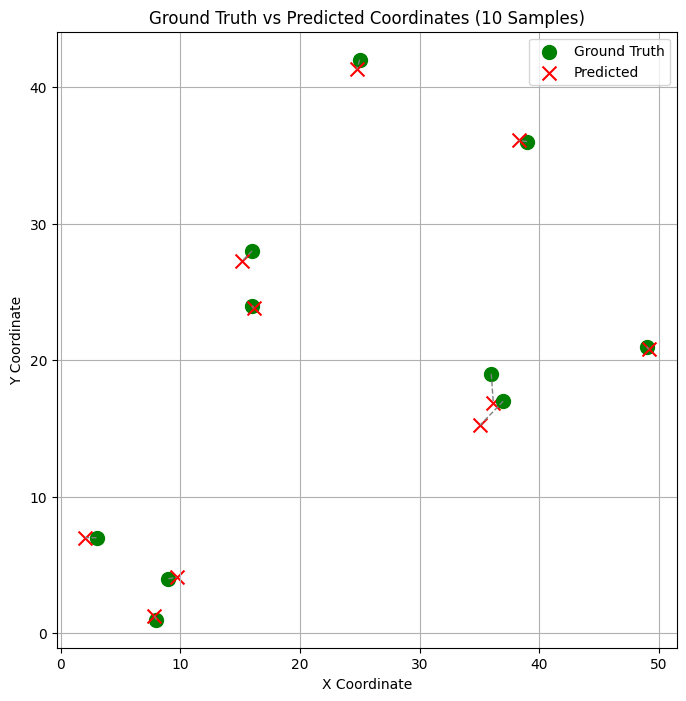

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


num_points = 10
indices = np.random.choice(len(X_test), num_points, replace=False)


Y_pred = model.predict(X_test[indices])

Y_test_pixels = Y_test[indices] * (IMAGE_SIZE - 1)
Y_pred_pixels = Y_pred * (IMAGE_SIZE - 1)


plt.figure(figsize=(8, 8))

for i in range(num_points):

    plt.scatter(
        Y_test_pixels[i, 0],
        Y_test_pixels[i, 1],
        c="green",
        marker="o",
        s=100,
        label="Ground Truth" if i == 0 else ""
    )


    plt.scatter(
        Y_pred_pixels[i, 0],
        Y_pred_pixels[i, 1],
        c="red",
        marker="x",
        s=100,
        label="Predicted" if i == 0 else ""
    )


    plt.plot(
        [Y_test_pixels[i, 0], Y_pred_pixels[i, 0]],
        [Y_test_pixels[i, 1], Y_pred_pixels[i, 1]],
        c="gray",
        linestyle="--",
        linewidth=1
    )

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Ground Truth vs Predicted Coordinates (10 Samples)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save("pixel_coordinate_mlp.keras")
print("Model saved successfully.")


Model saved successfully.


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("pixel_coordinate_mlp.keras")


sample_pred = loaded_model.predict(X_test[:1])
print("Loaded model prediction:", sample_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Loaded model prediction: [[0.6602784  0.92672354]]
